In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_fakedata_reweight/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_fake_data.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_overlay_V26_mar18.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_fakedata = NuCC.getPOT(inputdir,filename_data,tree_name)
pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files

print pot_fakedata
pot_data =    7.644e+18  # best with tor875
pot_data = pot_fakedata
pot_data_draw = 1.268e+21
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	1012051
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

1.26811760704e+21
POT: 
Data:		1.26811760704e+21
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	1.0
Dirt:		10.1433427383


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    #filename_overlay = filename_overlay+'out4.root'
    filename_overlay = 'NuCCana_overlay_V26_mar18_noflux.rootout4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_overlay
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	1013969
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 9.35741e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

#energy_cut = ' && MCle_Energy>0.15'
    
#numu_signal = numu_signal+energy_cut
#numu_true = numu_true+energy_cut
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [13]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

In [14]:
weight_name_fake = 'EventWeight*TunedCentralValue_Genie'
#weight_name_fake = 'EventWeight'
#weight_name_fake = 'EventWeight*RPA_CCQE_UBGenie[0]'
#weight_name_fake = '(((2*(Genie_nNeutron_preFSI>0))|Genie_nNeutron_preFSI==0)/(((2*(Genie_nProton_preFSI>0)) | Genie_nProton_preFSI==0)))*EventWeight*TunedCentralValue_Genie'
#weight_name_fake = 'EventWeight*XSecShape_CCMEC_UBGenie[1]'
#weight_name_fake = '(EventWeight*TunedCentralValue_Genie*(2*(Genie_nPiPlus_preFSI>0))+0.88*(Genie_nPiPlus_preFSI==0))'
#weight_name_fake = 'EventWeight*TunedCentralValue_Genie*1013969.0/987274.0*(MCle_Energy>0.15 ||MCle_Energy==-1)'
#weight_name_fake = '1'
#weight_name_fake = '1'
#weight_name_fake = '1'
f_weight = open(output_filedir+weight_name_fake+".txt","a+")
#f_weight = open(output_filedir+'Weightname'+".txt","a+")
f_weight.write("Used Weight as fake data: %s\n" % weight_name_fake)
f_weight.close() 

In [15]:
# calculate total flux integrated cross section:
'''
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
#N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
#N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]
print N_overlay
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
#globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
#dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name_fake+'>>h_weight_func',cut,'0') # weights for signal definition
N_data_pass = h_weight_func.GetMean()
overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

#N_dirt = N_dirt*dirt_pass_weight
N_data = N_data*N_data_pass
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
#print 'Number of ext:', N_ext
#print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC
'''

'\ncut = \'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1\'\nN_data = data_out.GetEntries(cut)\n#N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]\n#N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]\nN_overlay = overlay_out.GetEntries(cut+\'&& !numu_signal\')*scale_out[overlay_out]\nN_signal = overlay_out.GetEntries(cut+\'&& numu_signal\')*scale_out[overlay_out]\nN_true = overlay_out.GetEntries(\'numu_true\')*scale_out[overlay_out]\nprint N_overlay\nh_weight_func = ROOT.TH1F("h_weight_func",\'h_weight_func\',10000,0,1000)\n#globale.overlay_out.Draw(weight_name+\'>>h_weight_func\',cut+\' && 1\',\'0\')\n#dirt_pass_weight = h_weight_func.GetMean() \nglobale.overlay_out.Draw(weight_name+\'>>h_weight_func\',cut+\' && numu_signal\',\'0\') # weights for signal definition\noverlay_signal = h_weight_func.GetMean()\nglobale.overlay_out.Draw(weight_name+\'>>h_weight_func\',cut+\' && !numu_signal\',\'0

In [16]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins',mom_bins)
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [17]:
#x = np.load('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins.npy')
#print x

In [18]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data_draw)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data_draw)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [19]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


[0.07894978 0.38479552 0.48165086 0.57688886 0.67759538 0.69810379]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_eff_trueMom.pdf has been created


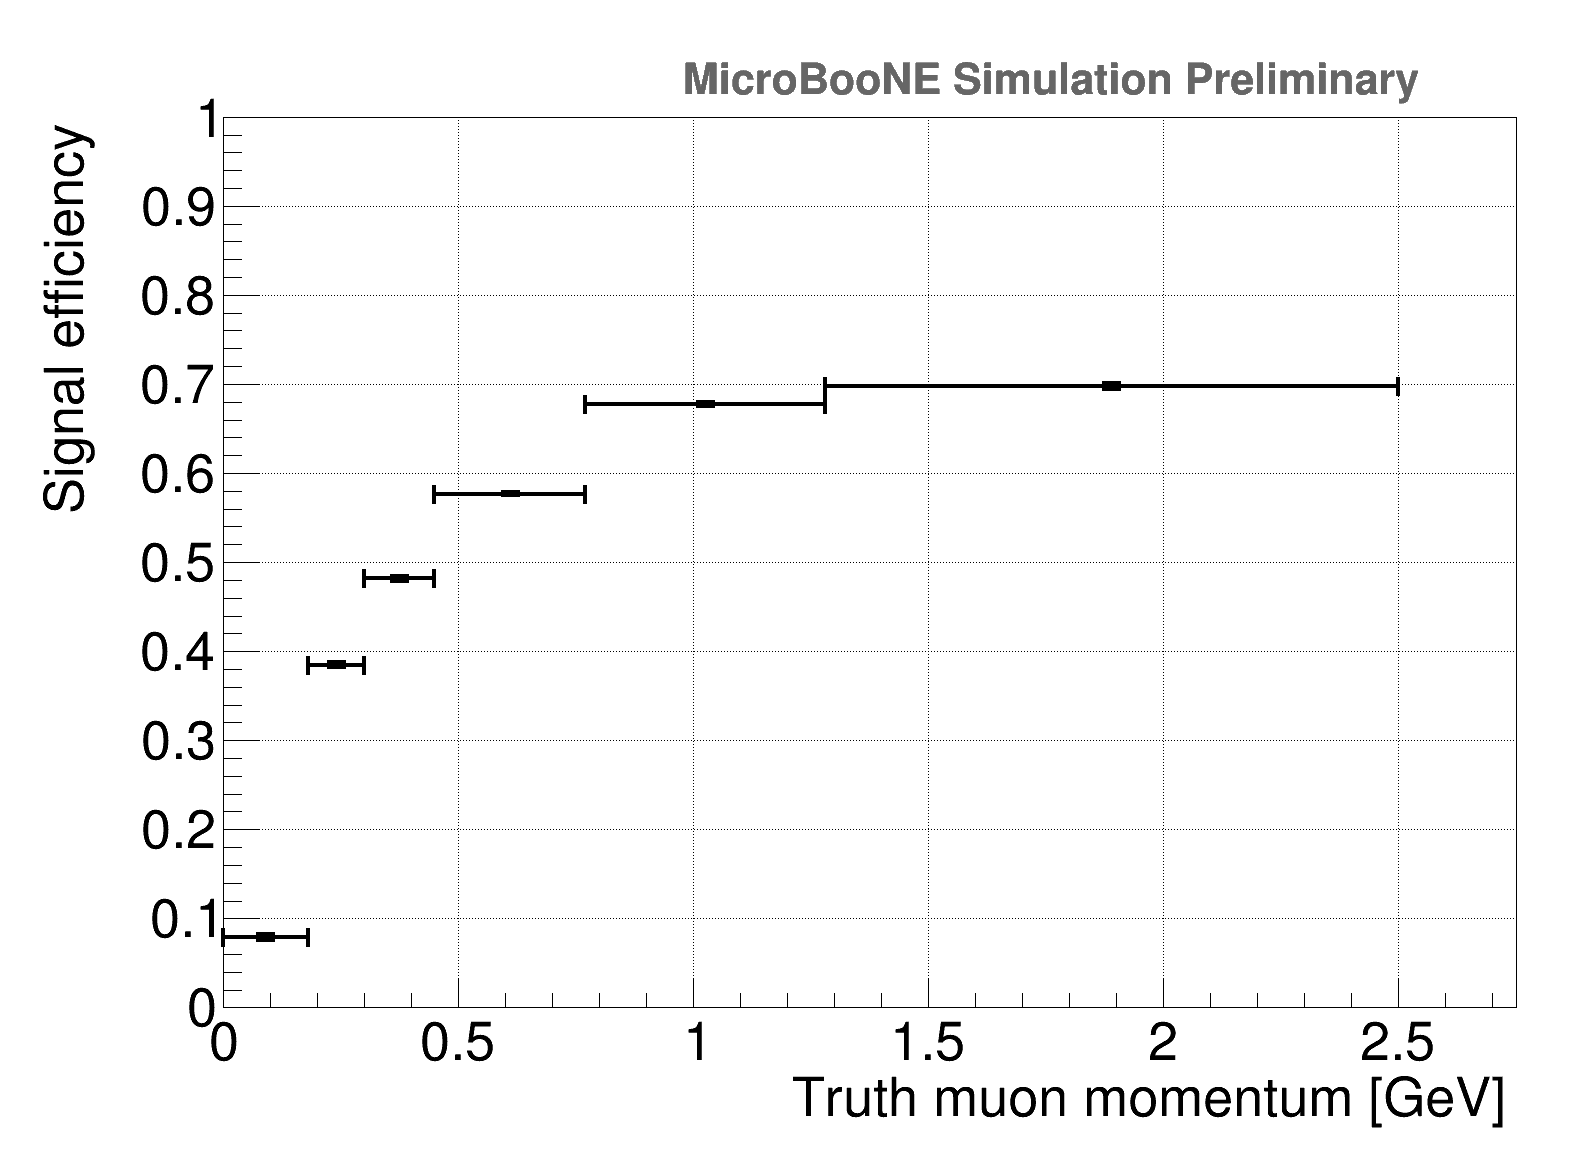

In [20]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_momentum',true_eff_arr)

In [21]:
N_sig = h_init_eff_energy.Integral(0,binnum+1)
N_true = h_init_eff_energy_1.Integral(0,binnum+1)
print N_sig/N_true,N_sig,N_true

0.525777951598 161464.449463 307096.273193


1241

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h2_true_MCS_bin.pdf has been created


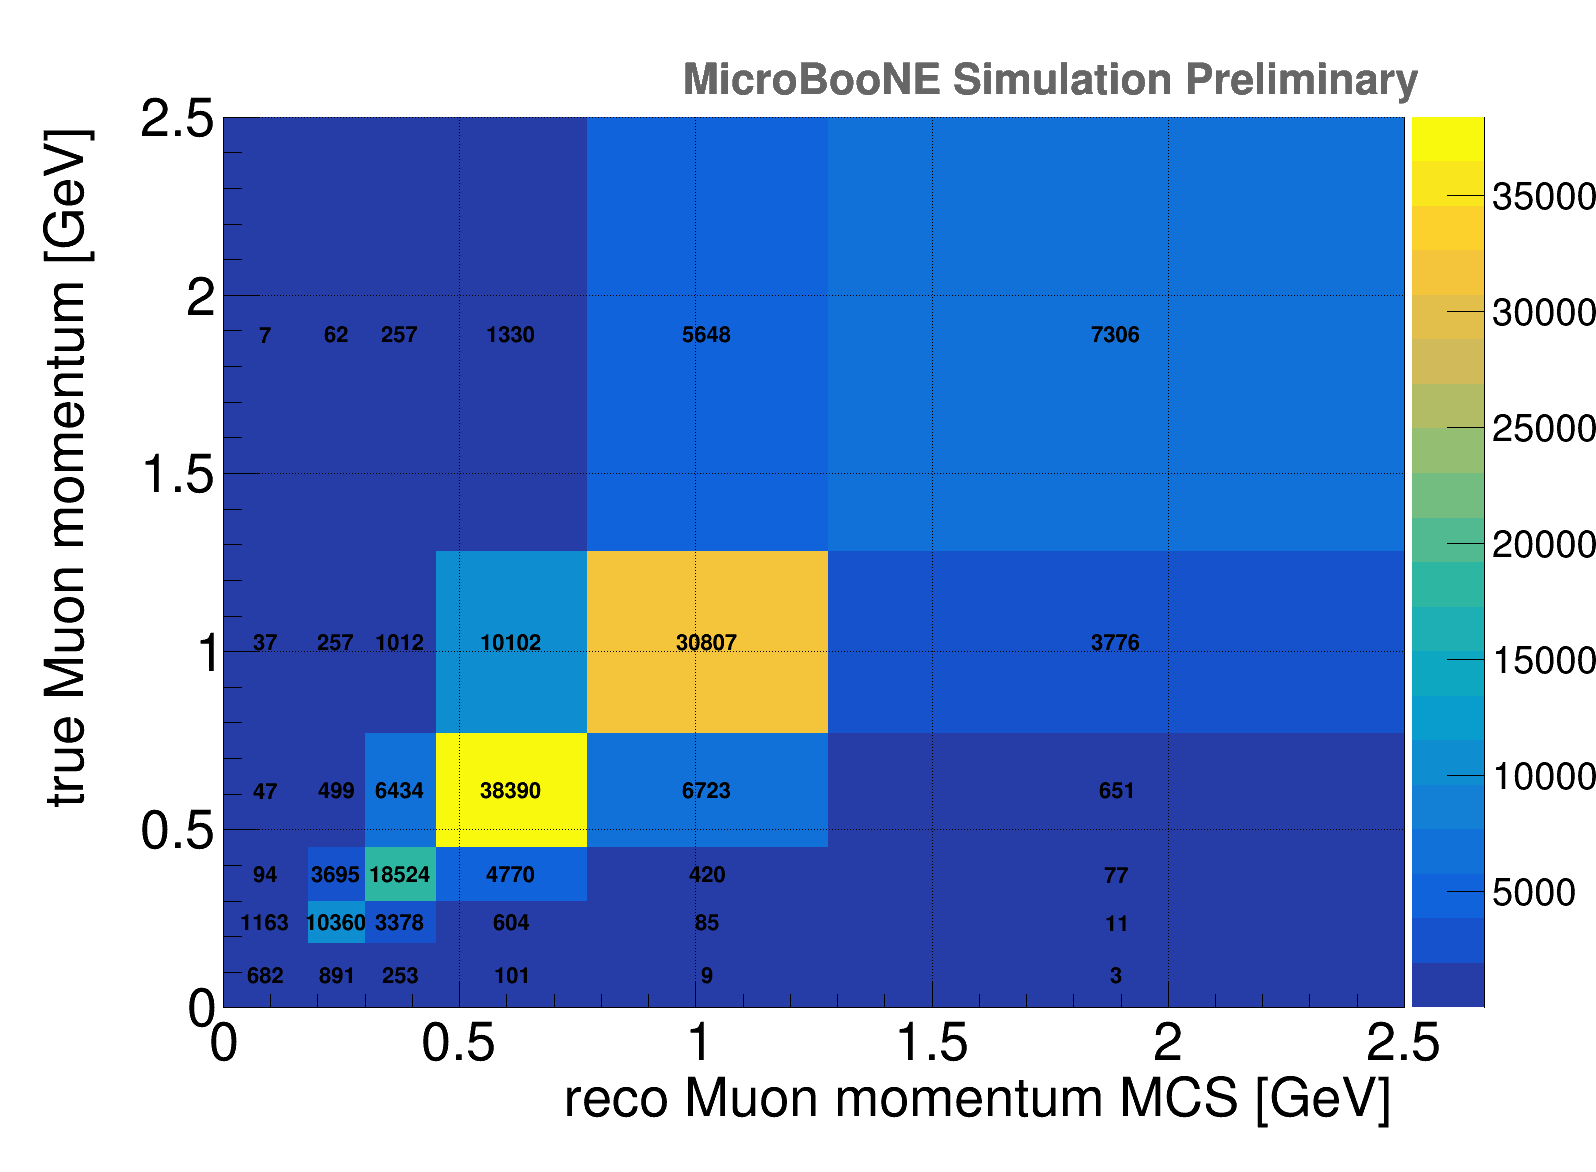

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

[[3.51532700e-01 7.45338892e-02 3.40693322e-03 8.96389245e-04
  7.93611950e-04 4.71684225e-04 0.00000000e+00]
 [4.59313684e-01 6.64004371e-01 1.33865456e-01 9.43905614e-03
  5.55864565e-03 4.21833229e-03 2.54957328e-03]
 [1.30434979e-01 2.16526165e-01 6.71021187e-01 1.21785999e-01
  2.19308359e-02 1.73603381e-02 1.72136926e-02]
 [5.21892738e-02 3.87294220e-02 1.72800600e-01 7.26646307e-01
  2.18836997e-01 8.98685059e-02 8.65393959e-02]
 [4.69779862e-03 5.45928548e-03 1.52319875e-02 1.27261228e-01
  6.67376502e-01 3.81703871e-01 2.32040182e-01]
 [1.31622060e-03 6.82777474e-04 2.80402662e-03 1.23250962e-02
  8.18019517e-02 4.93737938e-01 5.72139833e-01]
 [5.15343761e-04 6.40902526e-05 8.69810443e-04 1.64592432e-03
  3.70145607e-03 1.26393305e-02 8.95173230e-02]]


685

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_mitigation_matrix.pdf has been created


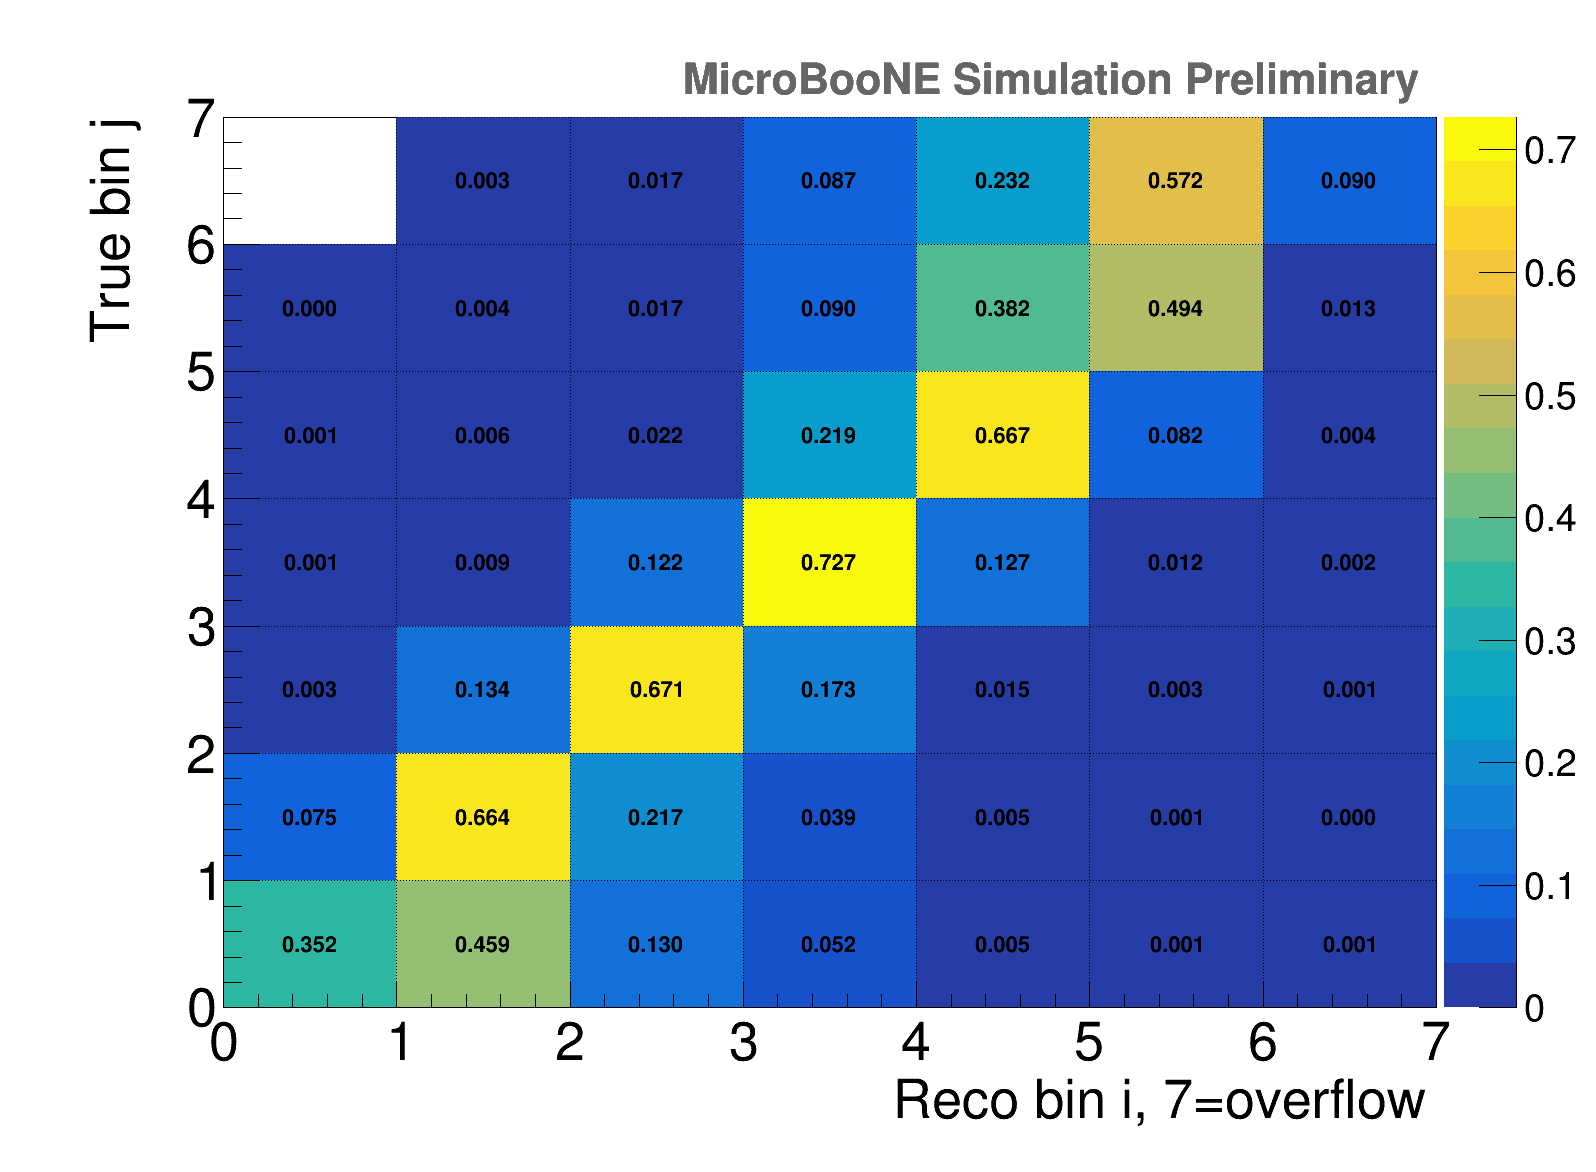

In [23]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]
mitigation_matrix = np.zeros((7,7))
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,7,0,7)
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#mitigation_matrix = mitigation_matrix.transpose()
print mitigation_matrix
#np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [24]:
#print h_mitigation_matrix
h_test_true = [1,0,0,0,0,0,0]
h_test_reco = mitigation_matrix.dot(h_test_true)
print h_test_reco

[0.3515327  0.45931368 0.13043498 0.05218927 0.0046978  0.00131622
 0.00051534]


In [25]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

487

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [26]:
# e tilde
N_sel = np.zeros((7))
N_gen = np.zeros((7))
for i in range(1,binnum+2):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
#eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
#np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_momentum',eff_tilde)
print output_filedir

1941.452392578125 24590.98046875 0.07894977571330698
15604.9345703125 40553.8359375 0.38479552450629384
27612.171875 57328.19140625 0.481650845730146
52833.2109375 91583.0 0.5768888433169912
46164.796875 68130.328125 0.6775953990754393
14797.4921875 21196.693359375 0.6981038002776634
2510.390625 3713.243896484375 0.6760640278374355
[0.16909729 0.33391595 0.47071118 0.57564498 0.65806381 0.67957989
 0.65109405]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/


In [27]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

470

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_eff_tilde_xsecMom.pdf has been created


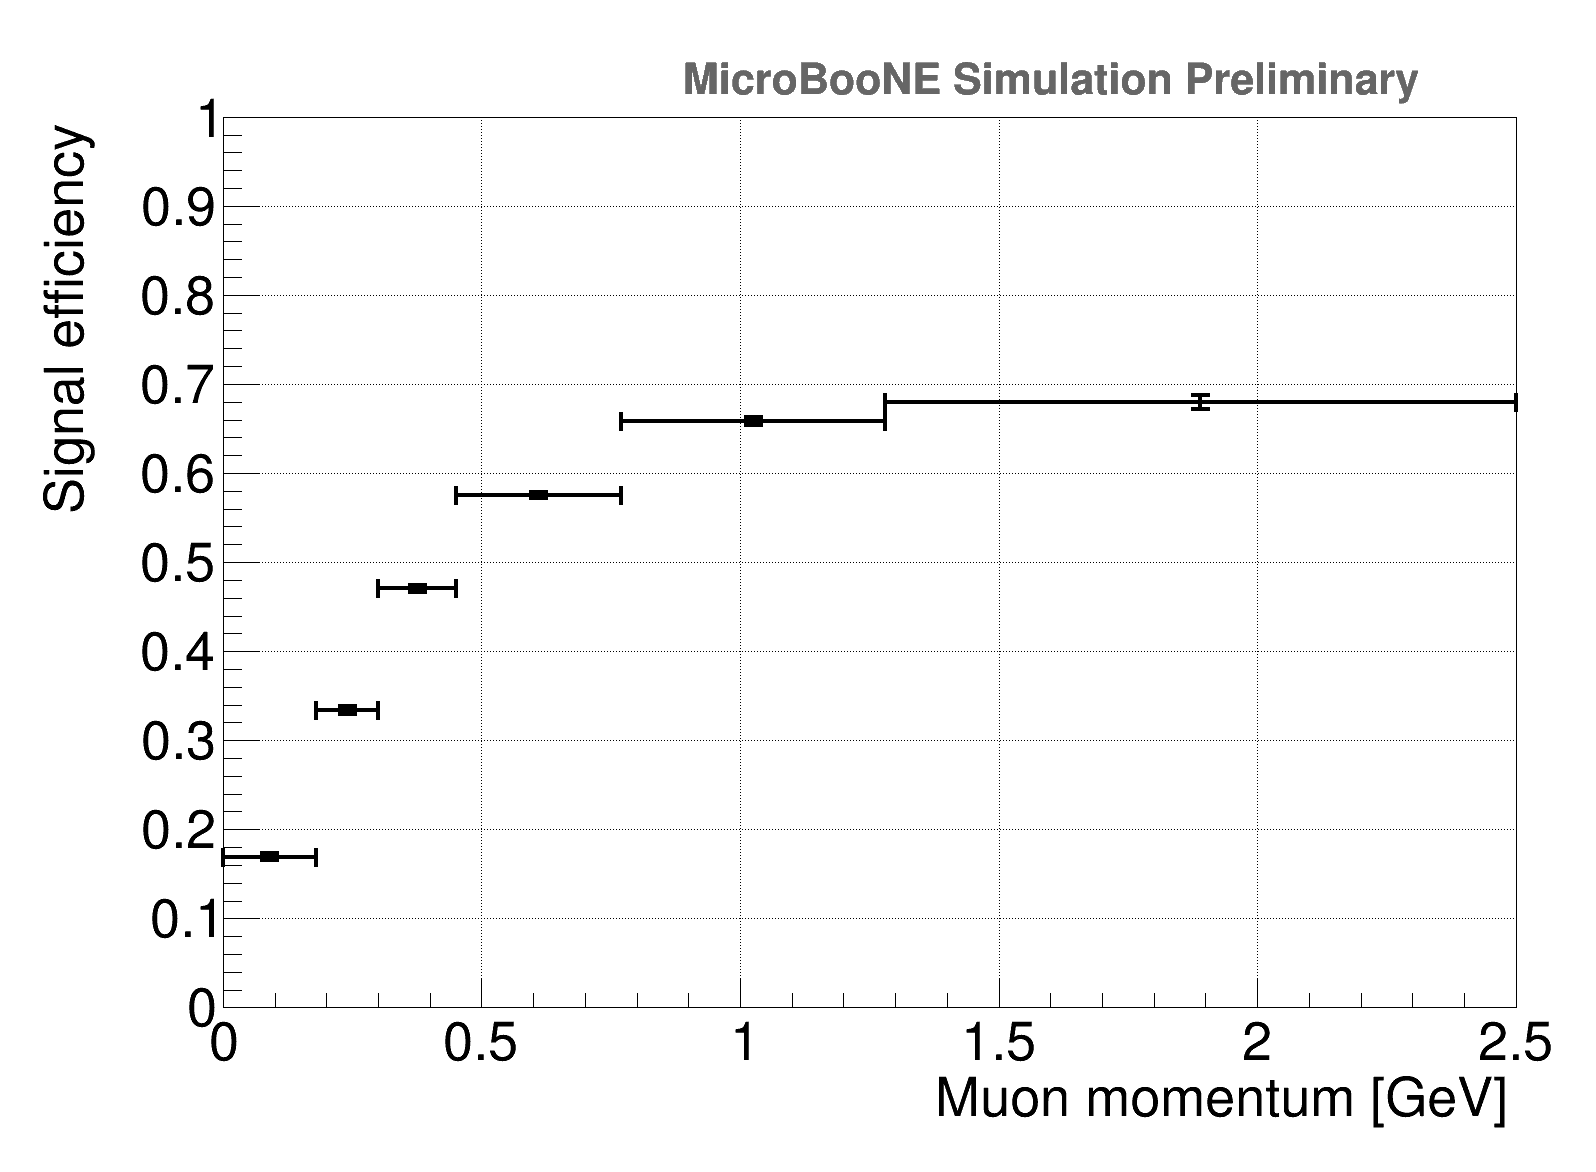

In [28]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+2):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [29]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))
#h_mctrue = ROOT.TH1F("h_mctrue",'h_mctrue',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data','('+cut+')*('+weight_name_fake+')','')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')
#globale.overlay_out.Draw(variable+'>>h_mctrue',weight_name+'*( numu_true)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

251443L

In [30]:

h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

439

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [31]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

32899.4918213
160755.539062


In [32]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.data_out.Draw('MCle_Energy'+'>>h_true',weight_name_fake+'*(numu_true)','')
h_true.Scale(globale.scale[globale.data])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [33]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+1))
for i in range(1,binnum+2):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+1))
true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

12008.643402766245
47239.213932238876
63536.504197508795
96444.500082614
67286.16755922388
19512.875675171785


In [34]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [35]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i)

0.965291968374
8.54377712632
7.35445854735
2.45294222503
0.673744504101
0.0341437596332


In [36]:
check_wes = 0.0
for i in range(1,binnum+2):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)
    check_wes = check_wes+h_data.GetBinContent(i)*h_data.GetBinWidth(i)
print check_wes
# 0.943597549453

0.173708245158 0.00955089589342
1.02507066727 0.0197517400365
1.10297942162 0.0133015331237
0.784911215305 0.00636701205547
0.34359139204 0.00301089053524
0.0416542701423 0.000650133107277
0.00278238090687 0.000152900067027
0.800338762775


In [37]:
#asdg

430

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_xsec_corr_ratio.pdf has been created


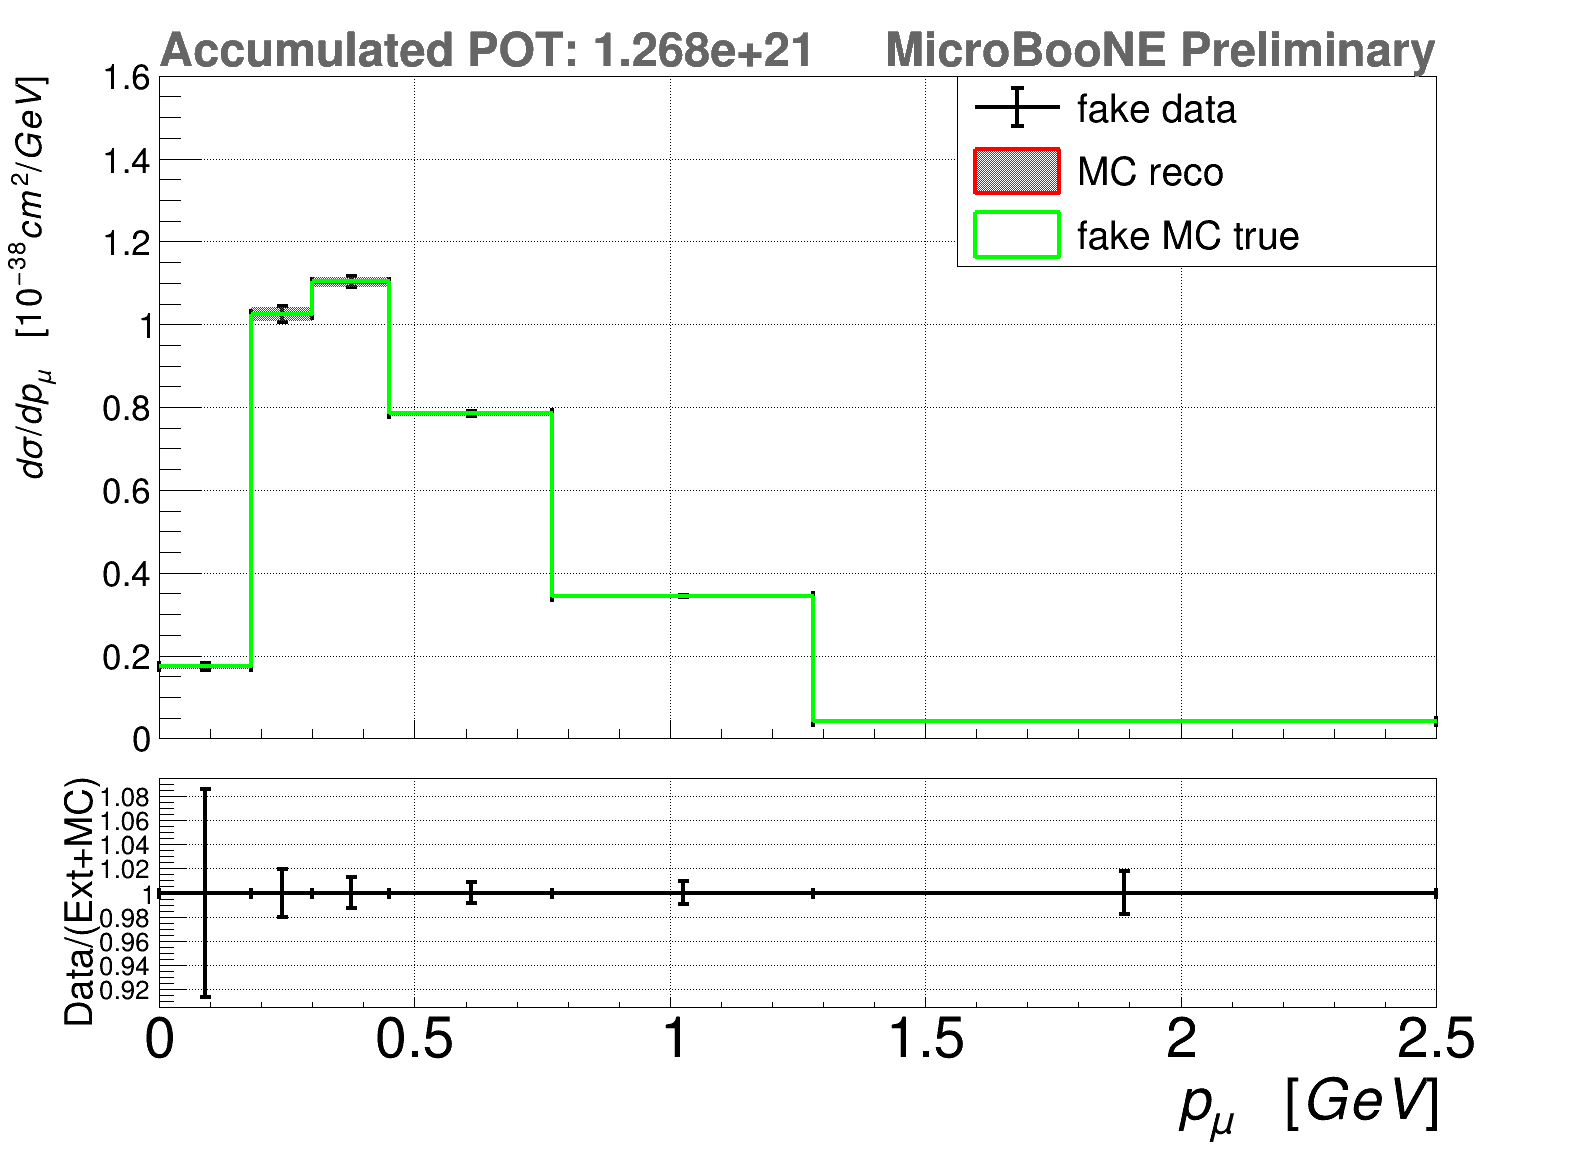

In [38]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'fake data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'fake MC true',"f");
legend.AddEntry(h_true_smeare,'fake MC true',"f");

h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_true_smeare)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_true_smeare)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_true_smeare)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_true_smeare)

#h_overlay_data_ratio.SetMinimum(h_overlay_data_ratio.GetMinimum())
#h_overlay_data_ratio.SetMaximum(h_overlay_data_ratio.GetMaximum())
h_overlay_data_ratio.SetMaximum(-1111)
h_overlay_data_ratio.SetMinimum(-1111)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
#h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
h_overlay_true_smeare_ratio.Draw('same hist')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [39]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [40]:
#asdgweag

In [41]:
# close the root file with all the histos
RootFile.Close()

# Now in cos(theta)

In [42]:
RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");

In [43]:
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/theta_bins',mom_bins)


In [44]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


[0.27340078 0.26633328 0.32030874 0.41838887 0.49424726 0.56131446
 0.63937557 0.70131642 0.71886778]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_eff_trueTheta.pdf has been created


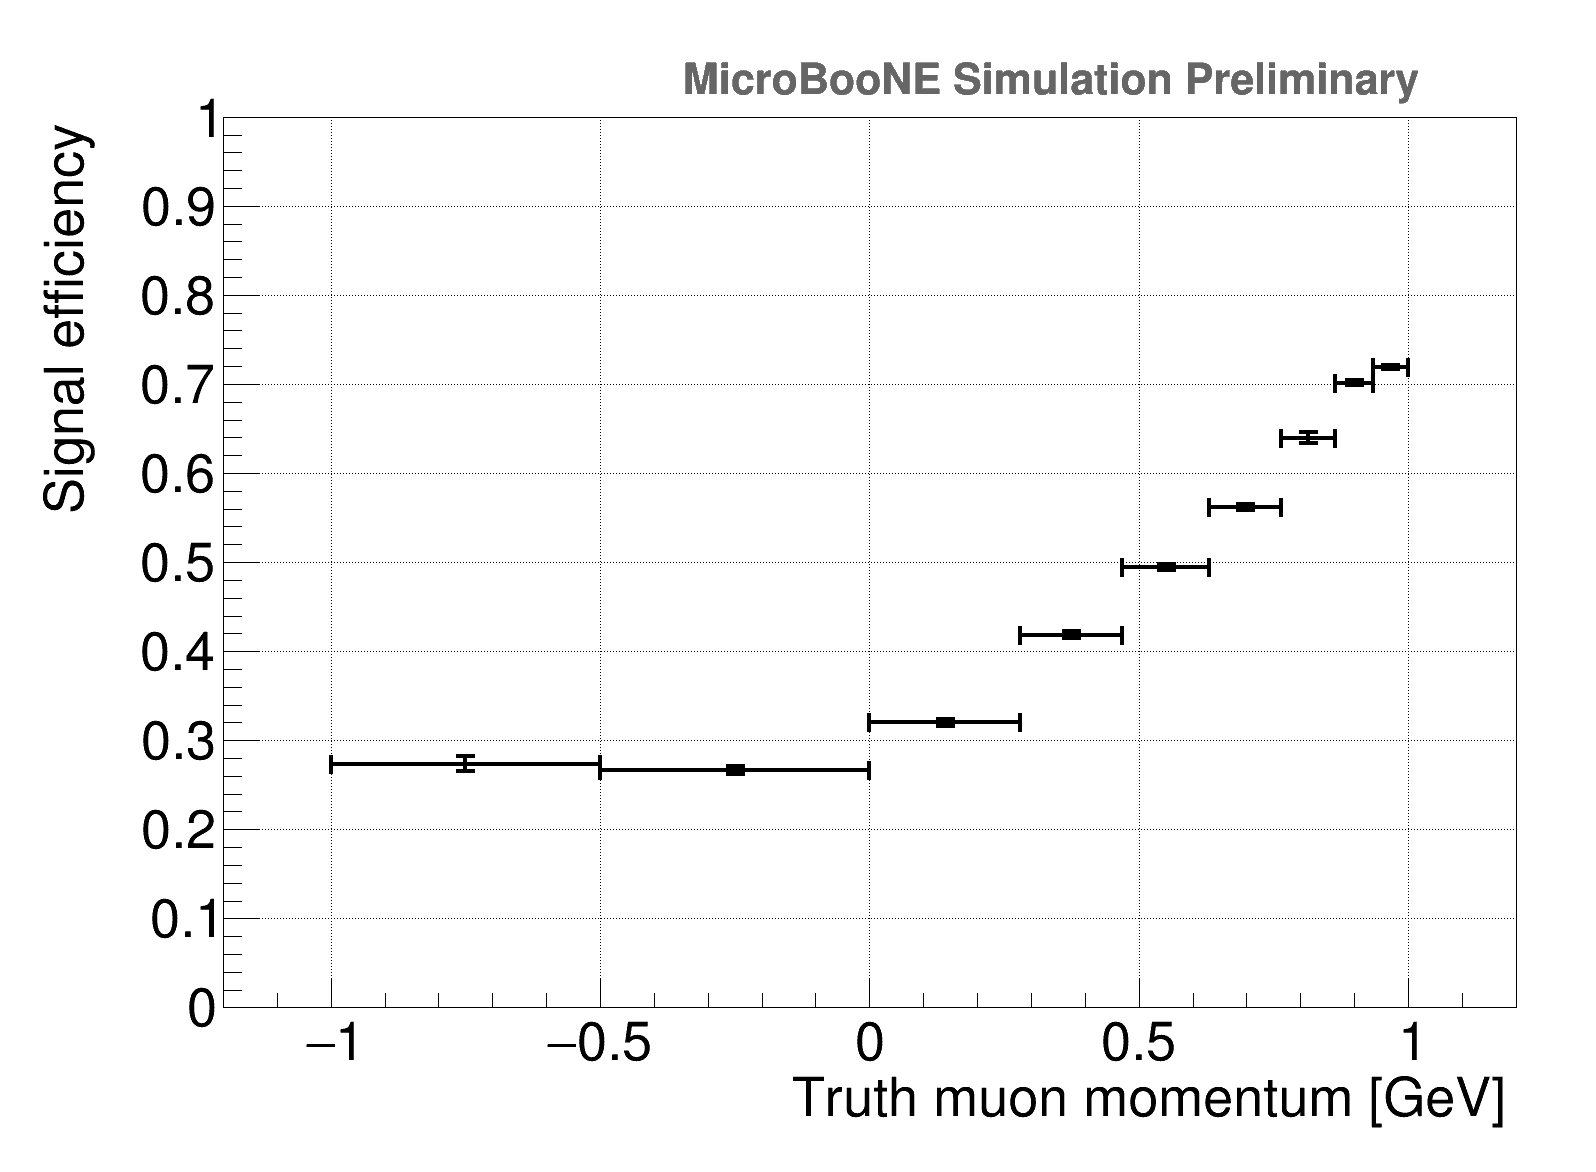

In [45]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_theta',true_eff_arr)

1660

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h2_true_Theta_bin.pdf has been created


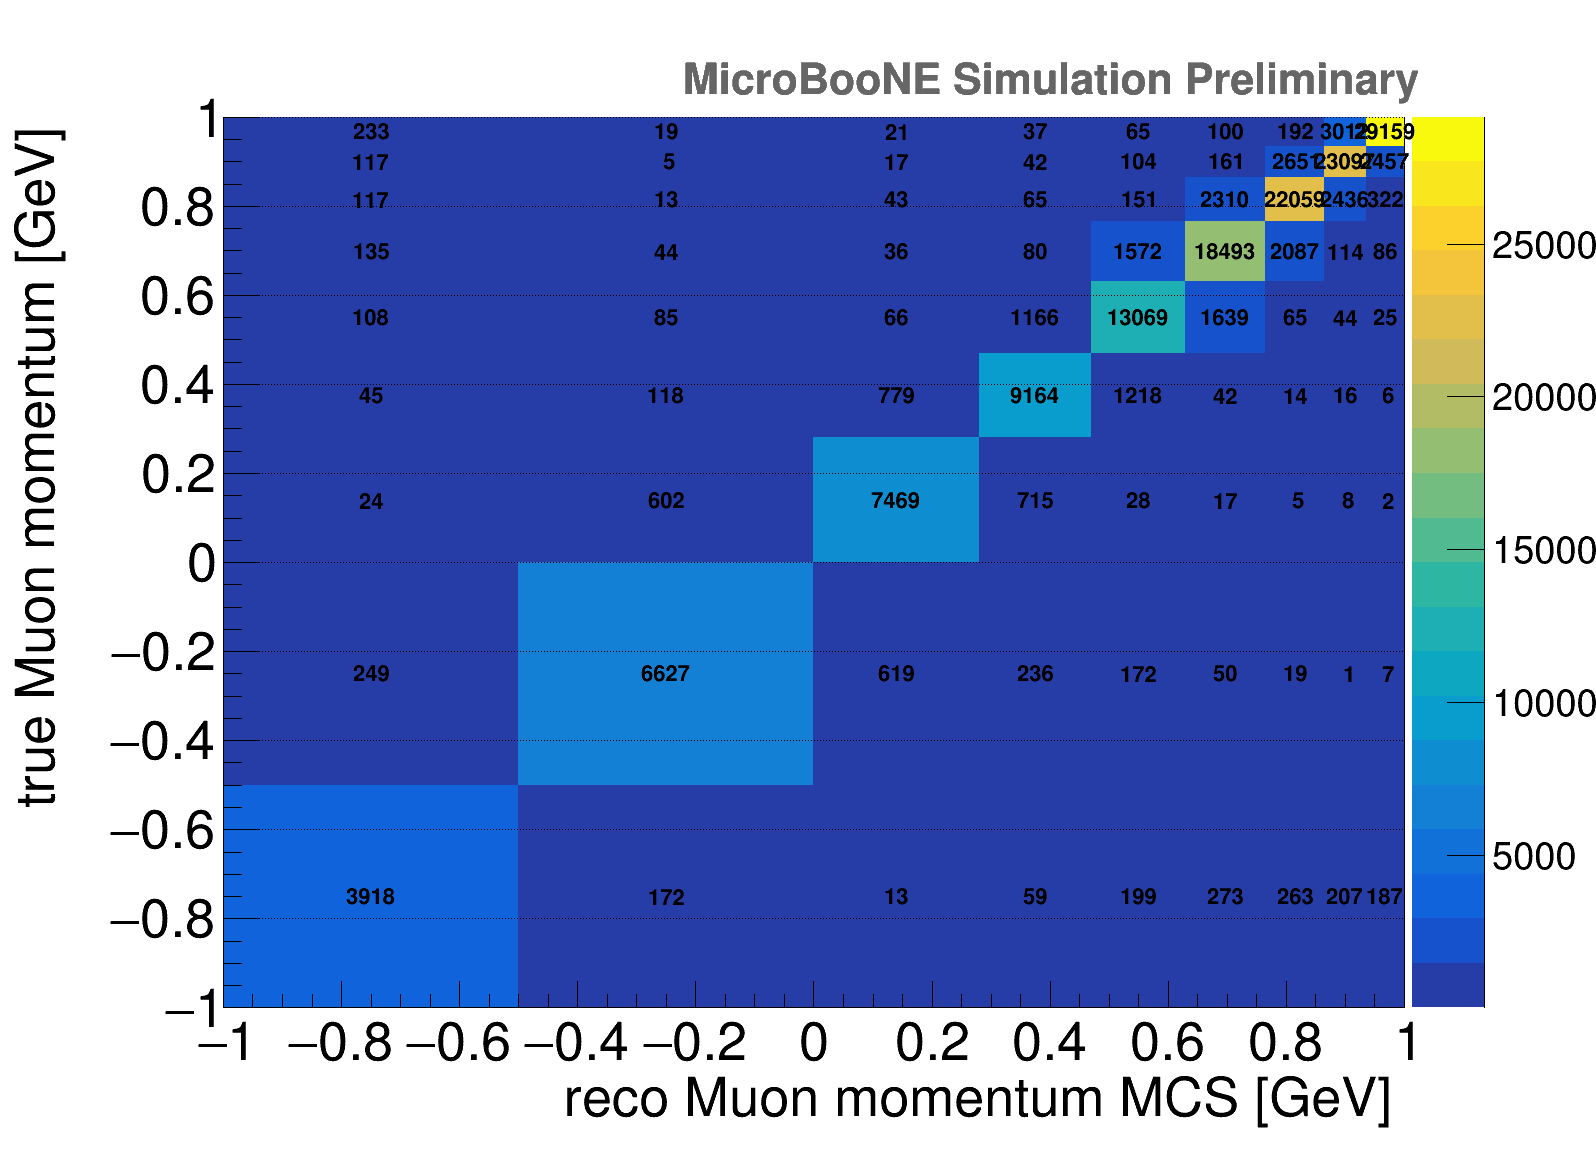

In [46]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.SetGrid(0)
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_Theta_bin.pdf")

h_migration.Write("h2_true_theta_bin")

[[7.40215228e-01 3.12035371e-02 2.71908926e-03 3.92496553e-03
  6.63480804e-03 5.95581221e-03 4.26803676e-03 4.07304116e-03
  7.09840199e-03]
 [3.24447638e-02 8.30320238e-01 6.78773140e-02 1.03922957e-02
  5.24562933e-03 1.92477340e-03 4.80080818e-04 1.73078860e-04
  5.81175163e-04]
 [2.54350944e-03 7.75917143e-02 8.42091031e-01 6.82907020e-02
  4.08055537e-03 1.58586257e-03 1.57254451e-03 5.83800641e-04
  6.46496607e-04]
 [1.12417581e-02 2.95241778e-02 8.05705514e-02 8.03778359e-01
  7.16539993e-02 3.51849495e-03 2.35189262e-03 1.45986831e-03
  1.11999219e-03]
 [3.76793363e-02 2.16063344e-02 3.10931368e-03 1.06811854e-01
  8.03437131e-01 6.94098372e-02 5.49634477e-03 3.62118968e-03
  1.98602630e-03]
 [5.16769587e-02 6.30239185e-03 1.94246959e-03 3.64320166e-03
  1.00731752e-01 8.16610556e-01 8.39606115e-02 5.61136617e-03
  3.05039801e-03]
 [4.97208836e-02 2.40242575e-03 5.17172549e-04 1.22021309e-03
  3.99798812e-03 9.21452579e-02 8.01630776e-01 9.25358144e-02
  5.84147668e-03]
 [3.90

843

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_mitigation_matrix_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_mitigation_matrix_theta.pdf has been created


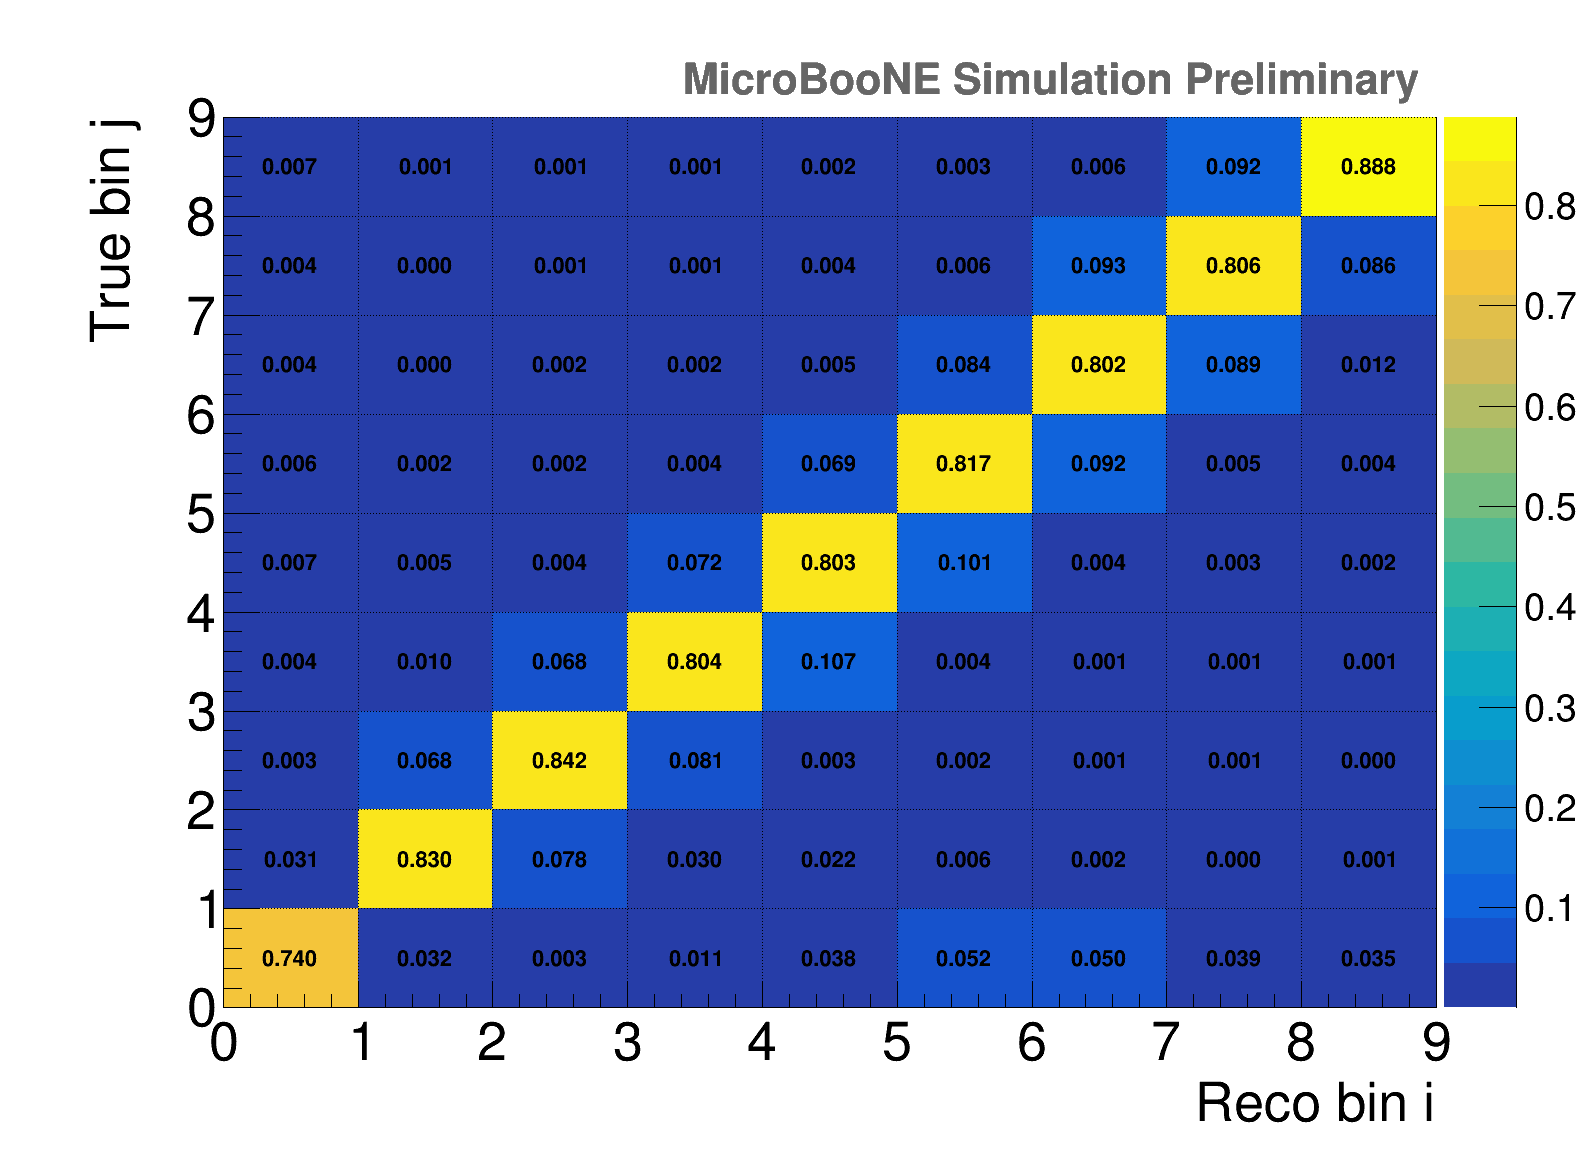

In [47]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#mitigation_matrix = mitigation_matrix.transpose()
print mitigation_matrix
#np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_theta',mitigation_matrix)

h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.SetGrid(1)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix_theta.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix_theta")

In [48]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

533

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [49]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((binnum))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
#np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_theta',eff_tilde)


5292.48291015625 19357.96484375 0.2734007915023673
7981.33837890625 29967.484375 0.2663332790644443
8869.330078125 27689.94140625 0.3203087340633762
11400.53125 27248.6484375 0.41838887077828113
16266.5517578125 32911.76953125 0.49424725529775215
22645.5078125 40343.7109375 0.5613144474384658
27517.1015625 43037.4609375 0.6393755803220124
28648.712890625 40849.91015625 0.701316423488921
32838.4609375 45680.80859375 0.7188677685095295
[0.2982934  0.27469687 0.32518549 0.41369772 0.48629008 0.55513163
 0.62914157 0.68809612 0.70873364]


In [50]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

511

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_eff_tilde_xsecTheta.pdf has been created


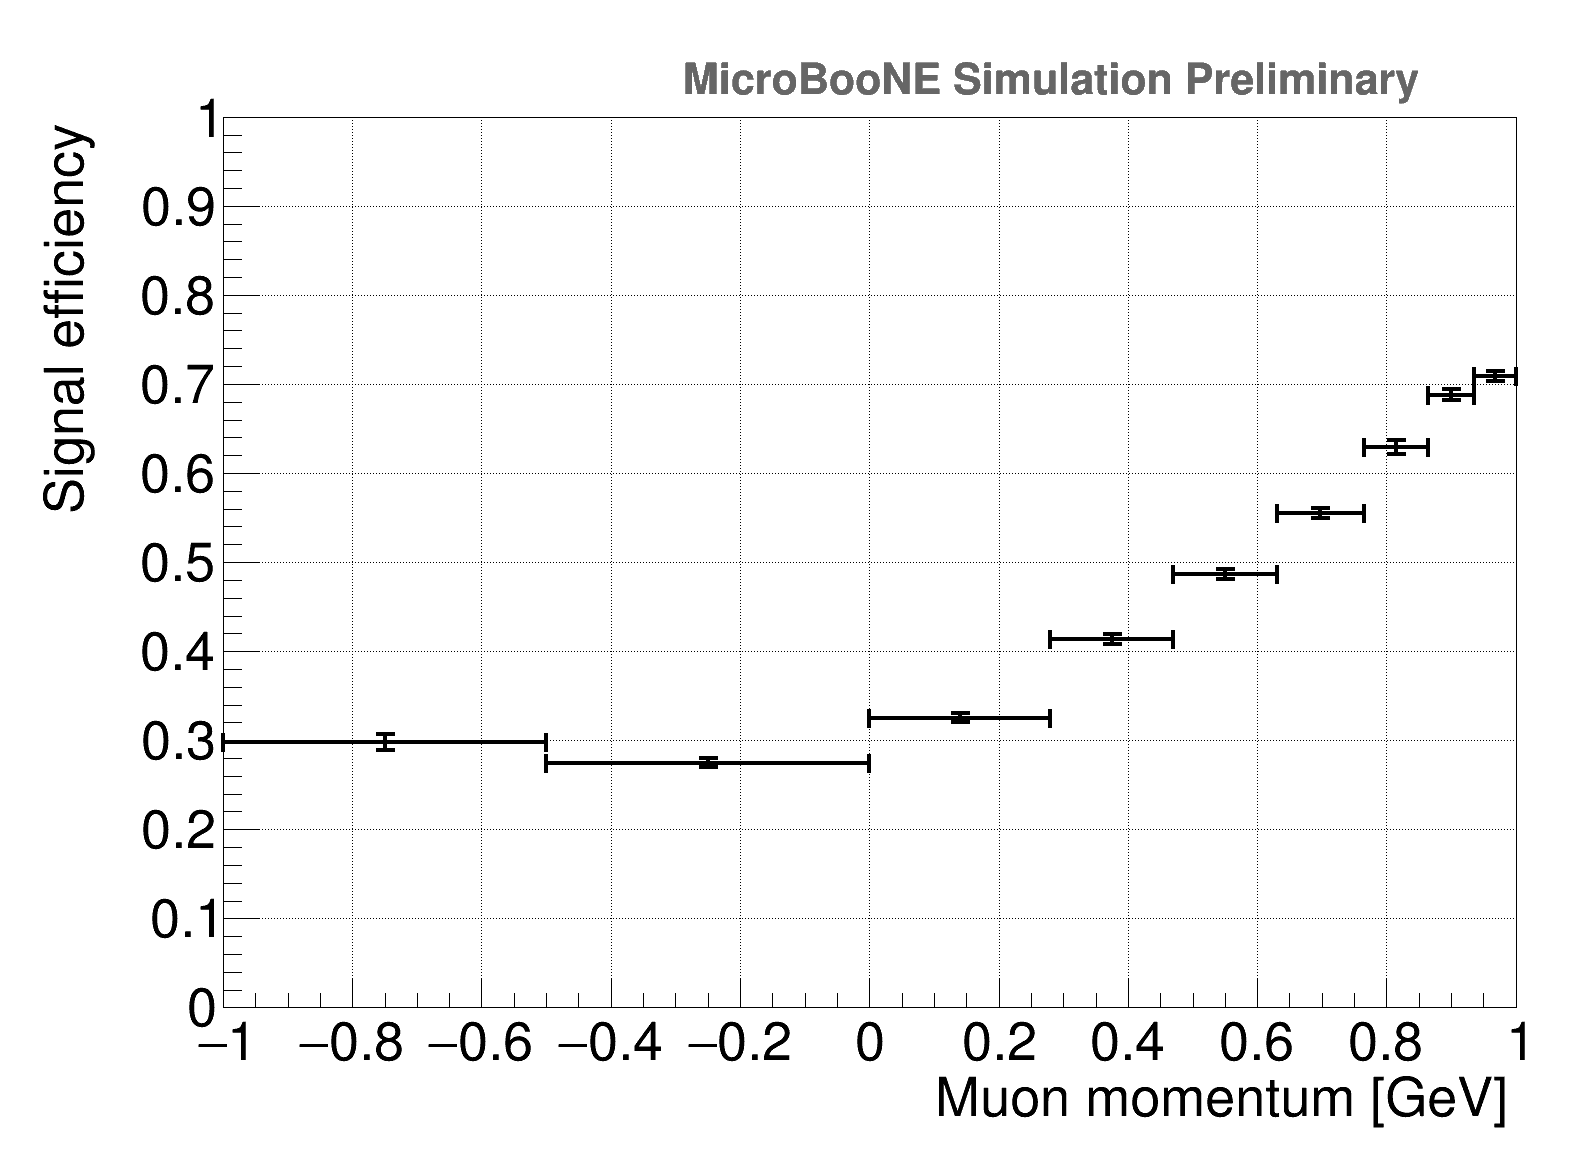

In [51]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [52]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data','('+cut+')*('+weight_name_fake+')','')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

251443L

In [53]:
h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

471

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [54]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

33040.9157715
161463.105469


In [55]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.data_out.Draw('cos(MCNu_leptonTheta)'+'>>h_true',weight_name_fake+'*(numu_true)','')
h_true.Scale(globale.scale[globale.data])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [56]:
print weight_name_fake

EventWeight*TunedCentralValue_Genie


In [57]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum))
for i in range(1,binnum+1):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum))
true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

16579.365709794845
27977.943914708416
27872.083173110495
27947.476848934155
34091.44350840284
41584.6671861076
43478.19819935871
42051.77520669118
45504.74547164176


In [58]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [59]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i)

0.172718033195
0.291464418173
0.925898015815
2.01625371627
3.46828893129
5.94258659452
11.3235112849
22.3510594727
28.0504475392


In [60]:
check_wes = 0.0
for i in range(1,binnum+2):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)
    check_wes = check_wes+h_data.GetBinContent(i)*h_data.GetBinWidth(i)
print check_wes
# 0.943597549453

0.0863589048386 0.00352235773268
0.145732417703 0.00369415187997
0.259250968695 0.00569491623945
0.383087575436 0.00718708279277
0.554925203323 0.00869098592102
0.802249133587 0.0106718843252
1.13235008717 0.0165787376261
1.56457173824 0.0178365009432
1.82346129417 0.0195674587285
0.0 0.0
0.799794253138


473

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/png/h_xsec_corr_theta_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/root/h_xsec_corr_theta_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_fakedata_reweight/pdf/h_xsec_corr_theta_ratio.pdf has been created


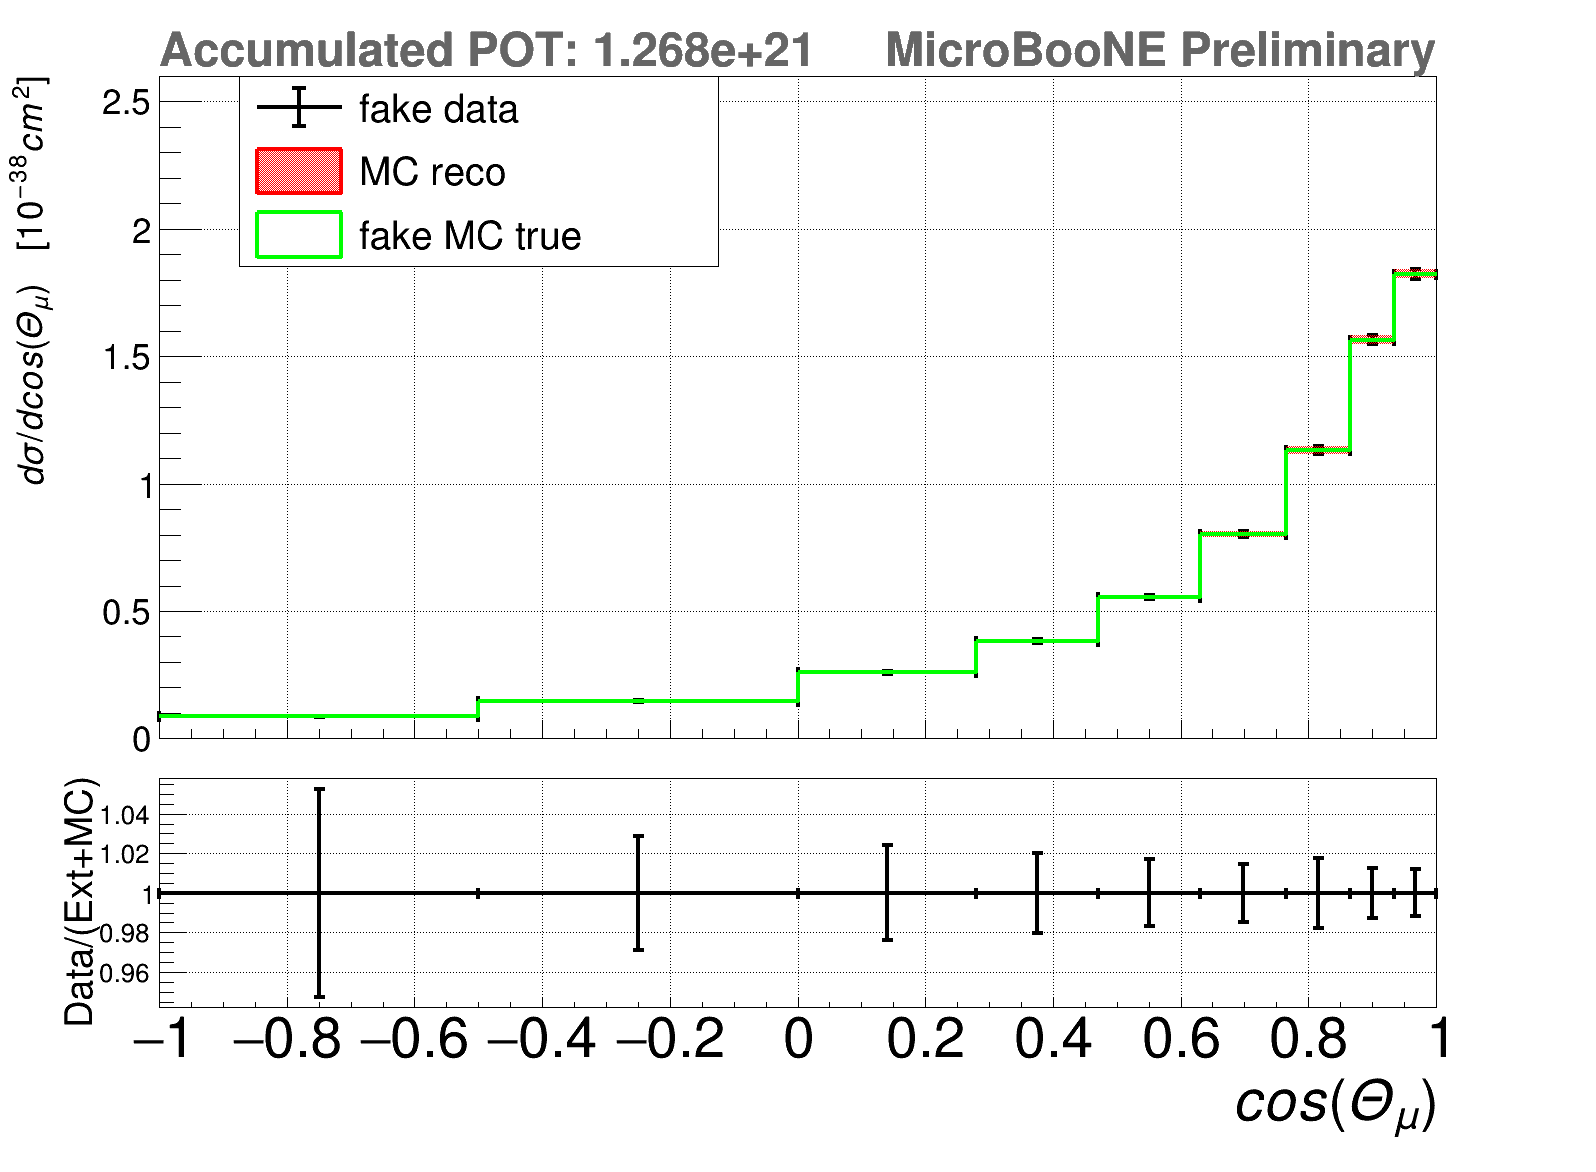

In [61]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend = ROOT.TLegend(0.15,0.65,0.45,0.9)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'fake data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'fake MC true',"f");
legend.AddEntry(h_true_smeare,'fake MC true',"f");

h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(2.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_true_smeare)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_true_smeare)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_true_smeare)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_true_smeare)

#h_overlay_data_ratio.SetMinimum(h_overlay_data_ratio.GetMinimum())
#h_overlay_data_ratio.SetMaximum(h_overlay_data_ratio.GetMaximum())
h_overlay_data_ratio.SetMaximum(-1111)
h_overlay_data_ratio.SetMinimum(-1111)
#h_overlay_data_ratio.SetMaximum(1.25)
#h_overlay_data_ratio.SetMinimum(0.9)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
#h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
h_overlay_true_smeare_ratio.Draw('same hist')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_theta_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_theta_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_theta_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [62]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [63]:
#dfgsdg

In [64]:
# close the root file with all the histos
RootFile.Close()